<a href="https://colab.research.google.com/github/SanjeevKalagony/SpotifyDSProject/blob/main/GrpahingSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
raw_data = files.upload()

Saving spotify_songs.csv to spotify_songs (1).csv


In [ ]:
spotify_songs = pd.read_csv('spotify_songs.csv')
spotify_songs = spotify_songs.sample(n=2000, random_state=42)
spotify_songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
30056,697MjF1454XKvZmTuqkWmD,I Miss You,Jeriqo,45,2vJ6FDg6ZMS56U8Wbiw2Oz,I Miss You,2019-02-05,Pop Hits 2000-2019,6mtYuOxzl58vSGnEDtZ9uB,edm,...,0,-7.717,1,0.0432,0.004910,0.000013,0.0816,0.415,174.026,216347
11827,3x2bXiU0o4WbsPkawXlfDA,Who Are You,The Who,17,6LRJF97hgXHj8uMLHyCDbh,Who Are You (Remastered),1978-08-18,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,...,9,-11.405,1,0.0511,0.265000,0.003130,0.1060,0.489,156.371,378707
23571,0jEaPBjFAWjQTMVouRwaHi,Happy,The Beef Seeds,30,4IQn9XpweytNX2cUe2NBUH,Keepin' it Beefy,2015-01-19,Bluegrass Covers,37i9dQZF1DX56crgoe4TG3,r&b,...,10,-5.204,1,0.1600,0.665000,0.000000,0.1270,0.932,86.529,218044
14741,5EKUb1FKsyYVaSXb41YBIj,ONE,Rev Theory,35,0gGic19XvEiHKKWBV7M4YM,ONE,2020-01-15,Rock Hard,37i9dQZF1DWWJOmJ7nRx0C,rock,...,4,-2.352,0,0.0453,0.000006,0.000000,0.3030,0.520,90.016,208196
25570,300DUx4tdtCdGEUXR032jA,Palace/Curse,The Internet,62,69g3CtOVg98TPOwqmI2K7Q,Ego Death,2015-06-26,NEO-soul,3q3M4VCymcMoxJ3Tl7mRqN,r&b,...,10,-8.212,0,0.3230,0.035100,0.000727,0.2430,0.261,67.104,440013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,33oVWYegPgHz4xes1bYUpk,Esperándola sin más,Ignasi Vidal,32,4SOrVF4WmQ9EGx9fVb74Vz,La Bella y la Bestia (Beauty and the Beast) [B...,2017-03-17,Post teen pop,7jQHOrErpLMStcUUSavQWR,pop,...,8,-8.459,1,0.0376,0.880000,0.000174,0.1050,0.221,97.272,194533
4105,6yOIdK2nKErlhyo5u7y81B,Dreamers,Savoir Adore,46,0CaWHOEBcnyUJ4OcrIvzWT,Our Nature,2012,The Sound of Indie Poptimism,7nHgmv7uyIA1KHj6qTttjH,pop,...,3,-6.052,1,0.0319,0.081100,0.000179,0.0873,0.656,102.516,249261
28588,1pJ41kt60x9ddrOJJ7X450,Fix Me - Official Parookaville 2016 Anthem / R...,twoloud,34,4NOnkydnZRXbKxqx21cl5T,Fix Me (Official Parookaville 2016 Anthem / Ra...,2016-06-24,PAROOKAVILLE - Big Room,6vbHQdtfmexb0ptmBSpemm,edm,...,4,-3.791,0,0.0322,0.007160,0.000000,0.6140,0.226,126.071,193501
14032,2N2QYANz84q0gQrWp4QTg8,Doing Yoga,Kazy Lambist,58,0H5IAA55ON8uu1bLRmckO7,On You (Radio Edit) - Single,2016-08-01,Permanent wave 🌊,0QN4FeJQ1mpCygRg9r2JIK,rock,...,4,-6.820,0,0.0922,0.214000,0.001120,0.3890,0.318,108.993,291573


In [ ]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

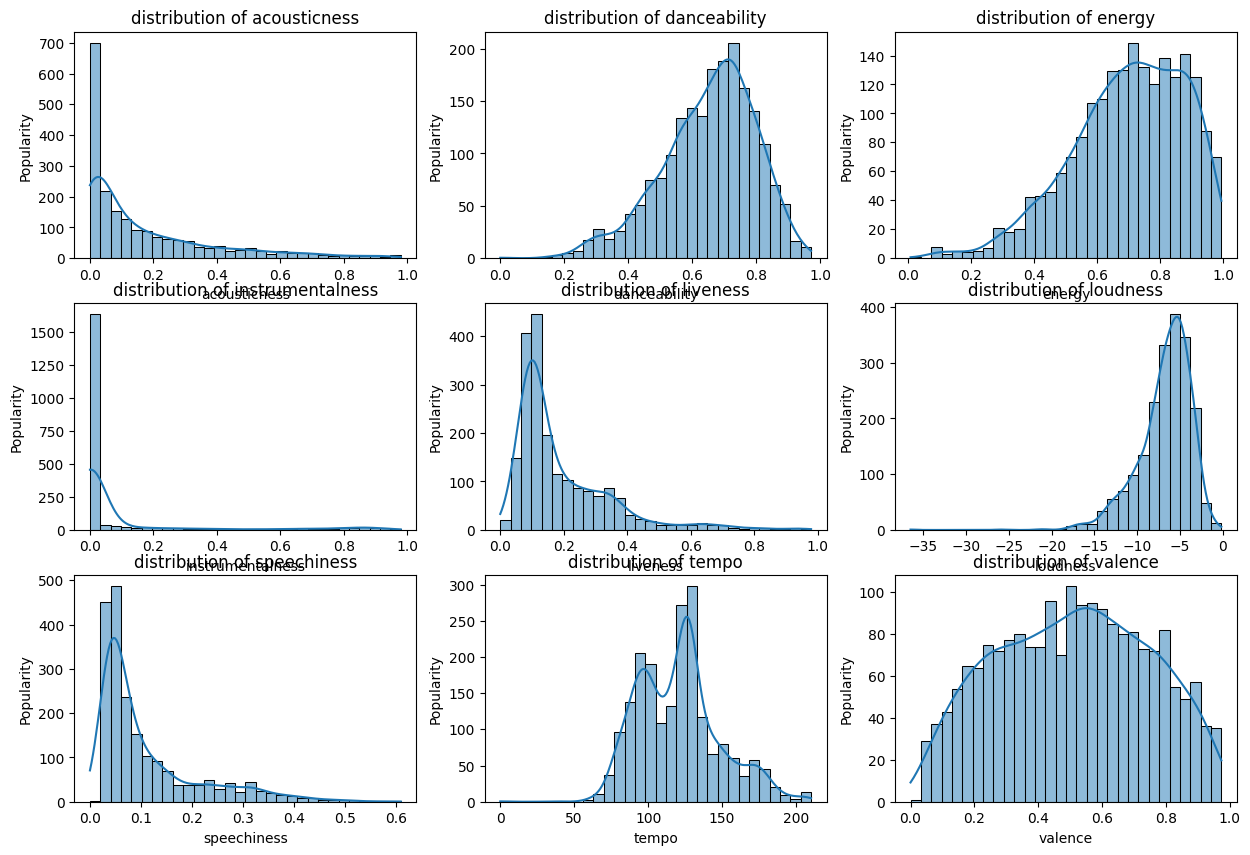

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
  sns.histplot(data=spotify_songs[feature], bins=30, kde=True, ax=axes[i])
  axes[i].set_title(f'distribution of {feature}')
  axes[i].set_ylabel('Popularity')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
spotify_songs[features] = scaler.fit_transform(spotify_songs[features])

In [ ]:
# prompt: spotify_songs_scaled = pd.DataFrame(spotify_songs_scaled, columns=features)sp

spotify_songs_scaled = pd.DataFrame(spotify_songs[features], columns=features)
spotify_songs_scaled

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
30056,0.005015,0.534979,0.792060,0.000014,0.083350,0.791990,0.070936,0.828049,0.426078
11827,0.270684,0.669753,0.662224,0.003197,0.108274,0.690543,0.083908,0.744043,0.502053
23571,0.679265,0.658436,0.760615,0.000000,0.129724,0.861116,0.262726,0.411721,0.956879
14741,0.000006,0.409465,0.971598,0.000000,0.309499,0.939566,0.074384,0.428313,0.533881
25570,0.035853,0.459877,0.625708,0.000743,0.248212,0.778374,0.530378,0.319294,0.267967
...,...,...,...,...,...,...,...,...,...
1510,0.898876,0.330247,0.402552,0.000178,0.107252,0.771579,0.061741,0.462839,0.226899
4105,0.082840,0.620370,0.896537,0.000183,0.089173,0.837790,0.052381,0.487790,0.673511
28588,0.007314,0.511317,0.677439,0.000000,0.627171,0.899983,0.052874,0.599870,0.232033
14032,0.218590,0.753086,0.762644,0.001144,0.397344,0.816664,0.151396,0.518609,0.326489


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# dummy variable
dummy_y = np.ones(spotify_songs_scaled.shape[0])

#apply
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=6)
X_selected = selector.fit_transform(spotify_songs_scaled, dummy_y)

In [ ]:
selected_features = np.array(features)[selector.support_]
print("Selected Features:", selected_features)

Selected Features: ['instrumentalness' 'liveness' 'loudness' 'speechiness' 'tempo' 'valence']


In [ ]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)
X_selected

,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.000014,0.083350,0.791990,0.070936,0.828049,0.426078
1,0.003197,0.108274,0.690543,0.083908,0.744043,0.502053
2,0.000000,0.129724,0.861116,0.262726,0.411721,0.956879
3,0.000000,0.309499,0.939566,0.074384,0.428313,0.533881
4,0.000743,0.248212,0.778374,0.530378,0.319294,0.267967
...,...,...,...,...,...,...
1995,0.000178,0.107252,0.771579,0.061741,0.462839,0.226899
1996,0.000183,0.089173,0.837790,0.052381,0.487790,0.673511
1997,0.000000,0.627171,0.899983,0.052874,0.599870,0.232033
1998,0.001144,0.397344,0.816664,0.151396,0.518609,0.326489


In [ ]:
pip install scipy

In [ ]:
# Find Optimal Number of Clusters using Elbow Method
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
inertia = []
distortions = []
k_range = range(1, 11)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_selected)
  inertia.append(kmeans.inertia_)
  distortions.append(sum(np.min(cdist(X_selected, kmeans.cluster_centers_, 'euclidean'), axis=1)**2))

Text(0.5, 1.0, 'Elbow Method for Optimal k')

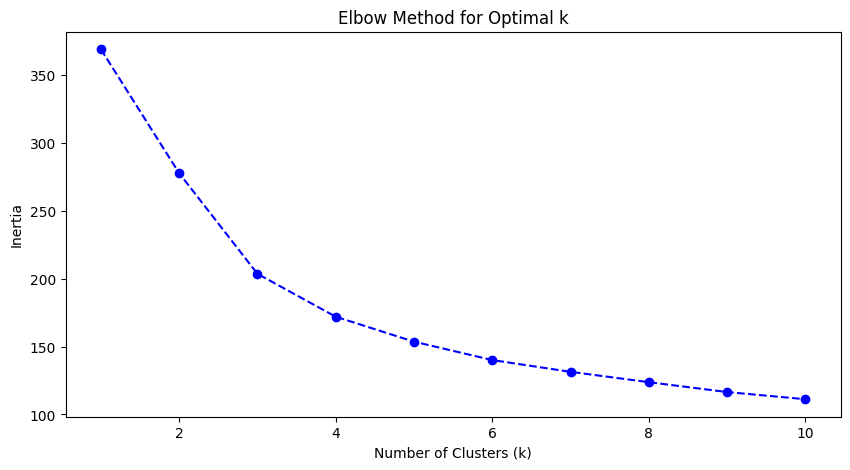

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = int(kl.elbow)
optimal_k

4

In [ ]:
# fit final k-means
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X_selected)
final_labels


array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(X_selected, final_labels)
print(silhouette_avg)

davies_avg = davies_bouldin_score(X_selected, final_labels)
print(davies_avg)


0.29334644261454
1.190155500558868


Text(0.5, 1.0, 'PCA loadings')

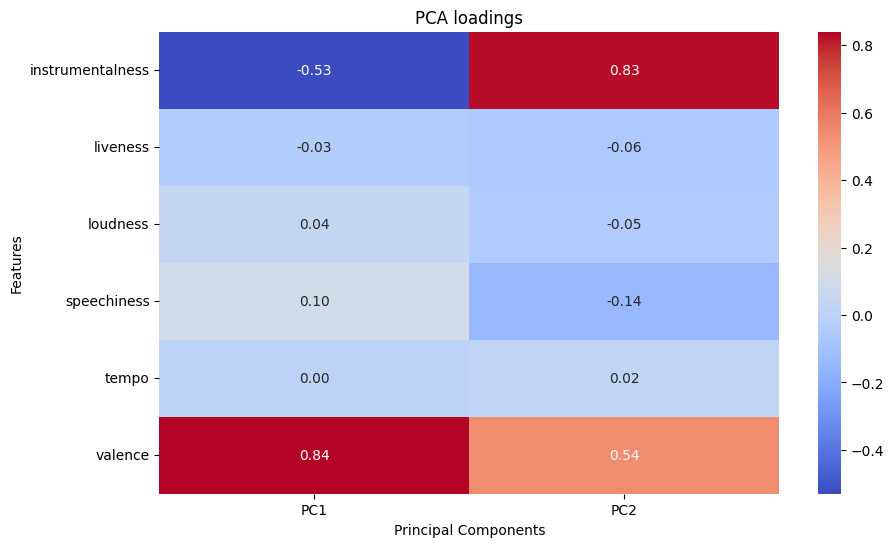

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=selected_features)
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.title("PCA loadings")

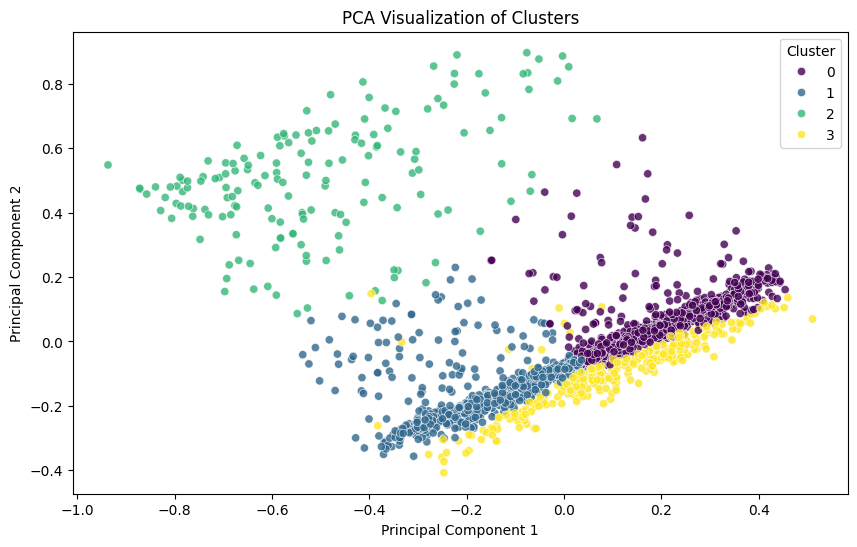

In [ ]:
df_pca_2d = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_2d['Cluster'] = final_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Cluster', palette='viridis',alpha=0.8)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
pip install plotly

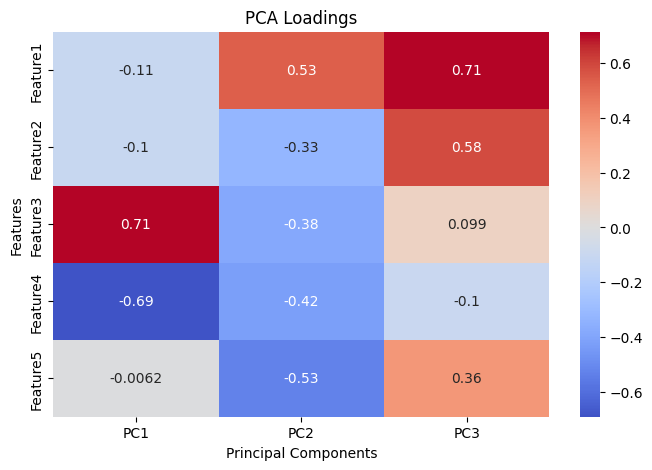

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset (Replace this with your actual dataset)
df = pd.DataFrame(
    np.random.rand(100, 5),  # 100 samples, 5 features
    columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']
)

# Select relevant features (replace with actual feature selection)
selected_features = df.columns
X_selected = df[selected_features]

# Standardize the data (PCA works best when features are standardized)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# PCA Feature Weightings (How much each feature contributes to PCA)
loadings_3d = pd.DataFrame(
    pca_3d.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=selected_features
)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(loadings_3d, annot=True, cmap='coolwarm', center=0)
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.title("PCA Loadings")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
final_labels = kmeans.fit_predict(X_pca_3d)

In [ ]:
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])

# Make sure final_labels is defined
# Example: final_labels = kmeans.fit_predict(X_pca_3d)
df_pca_3d['Cluster'] = final_labels

fig = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3',
                    color=df_pca_3d['Cluster'].astype(str),
                    title='PCA Visualization of Clusters',
                    color_discrete_sequence=px.colors.qualitative.Vivid,
                    opacity=0.8)
fig.show()
